In [9]:
import tensorflow as tf
import numpy as np
import PIL
import matplotlib.pyplot as plt
import sys
import tensorflow_hub as hub
from matplotlib import gridspec
from PIL import Image


In [10]:

def crop_center(image):
  """Returns a cropped square image."""
  shape = image.shape
  new_shape = min(shape[1], shape[2])
  offset_y = max(shape[1] - shape[2], 0) // 2
  offset_x = max(shape[2] - shape[1], 0) // 2
  image = tf.image.crop_to_bounding_box(
      image, offset_y, offset_x, new_shape, new_shape)
  return image

def load_image(image_path, image_size=(256, 256), preserve_aspect_ratio=True,sameSize=False):
  """Loads and preprocesses images."""
  # Cache image file locally.
  # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
  img = tf.io.decode_image(
      tf.io.read_file(image_path),
      channels=3, dtype=tf.float32)[tf.newaxis, ...]
  # img = crop_center(img)
  shape=(image_size[0],image_size[1])
  if sameSize:
    image_size=img.shape
    shape=(image_size[1],image_size[2])
  print(shape)
  img = tf.image.resize(img, shape, preserve_aspect_ratio=True)
  return img

def show_n(images, titles=('',)):
  n = len(images)
  image_sizes = [image.shape[1] for image in images]
  w = (image_sizes[0] * 6) // 320
  plt.figure(figsize=(w * n, w))
  gs = gridspec.GridSpec(1, n, width_ratios=image_sizes)
  for i in range(n):
    plt.subplot(gs[i])
    plt.imshow(images[i][0], aspect='equal')
    plt.axis('off')
    plt.title(titles[i] if len(titles) > i else '')
  plt.show()


In [11]:
content_image,style_image = load_image('rads.jpeg',sameSize=True),load_image('wierd.jpg')
style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='SAME')


(960, 1280)
(256, 256)


<module 'tensorflow_hub' from 'd:\\apps\\anaconda\\envs\\tf\\lib\\site-packages\\tensorflow_hub\\__init__.py'>


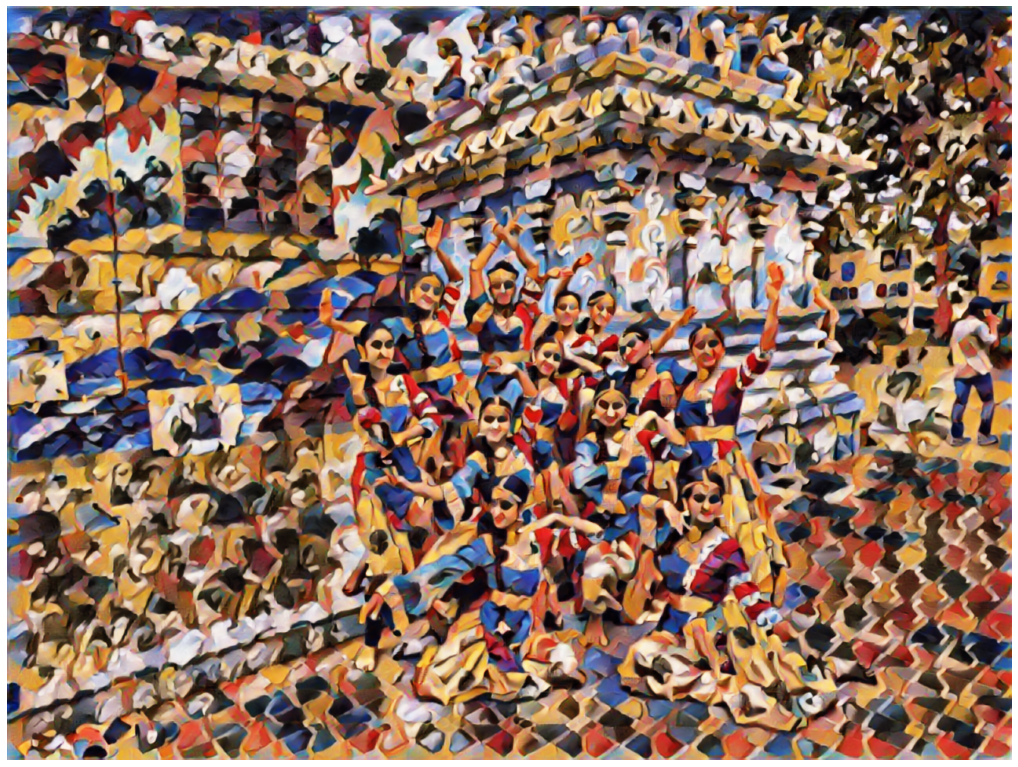

AttributeError: '_UserObject' object has no attribute 'save'

In [18]:
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
stylized_image.
